# <span style="color:Purple"> Numerical Simulation Laboratory : Exercise 9 </span>

### Exercise 09.1

Write a C++ code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population, e.g. select the individual $j$ with the algorithm: $j=N\times int(r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bods and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">32 cities randomly placed **on** a circumference</span>
- <span style="color:blue">32 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path</span>

# Esercizio 9.1 - <span style="color:deeppink"> Traveling salesman problem w/ genetic algorithm </span>

### Algoritmo 
Il mio algoritmo genetico è di tipo elitario, in ogni generazione la migliore metà della popolazione viene lasciata intatta, invece gli individui peggiori vengono sostituiti. Per ottenere i nuovi individui, si attuano operazioni di crossover e di mutazione. Ho costruito una popolazione di 300 individui, che ho fatto evolvere per 500 generazioni.

Il crossover avviene con probabilità $60 \%$ e la selezione degli individui a cui applicarlo è tale da prediligere la scelta di individui con un fitness migliore. Per fare ciò, l'indice che identifica l'individuo selezionato è estratto secondo $ i = \lfloor N u^4 \rfloor + 1 $ , dove N è la dimensione della popolazione e u è un numero estratto uniformemente nell'intervallo $[0 , 1)$. 
    
Le mutazioni avvengono con una probabilità del $50 \%$ e sono di 5 tipologie:
1. Uno scambio tra due geni selezionati in modo casuale 
2. Uno scambio tra due geni adiacenti
3. Lo shift di una parte di cromosoma
4. Una permutazione tra gruppi di dimensione casuale di città adiacenti
5. L'inversione dell'ordine di un numero casuale di città adiacenti
    
Per calcolare il fitness dei cromosomi, ossia la lunghezza loro cammino, ho usato una norma $L^{(1)}$. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
#loading cities' positions
x_circle , y_circle =  np.loadtxt( "pos_circle.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
x_square , y_square =  np.loadtxt( "pos_square.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)

In [3]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_circle = np.append( x_circle , x_circle[0])
y_circle = np.append( y_circle , y_circle[0])
x_square = np.append( x_square , x_square[0])
y_square = np.append( y_square , y_square[0])

In [4]:
#Carico i file contenenti i cammini ottimizzati
best_path_circle = np.loadtxt( "best_path_circle.txt" , dtype=int , delimiter = ",", usecols=(0) , unpack= True)
best_path_square = np.loadtxt( "best_path_square.txt" , dtype=int , delimiter = ",", usecols=(0) , unpack= True)

## Part 1: <span style="color:indigo"> Cities disposed on a circle <span>

In [5]:
#Riordino le città secondo l'ordine contenuto nel miglior cammino
x_circle_ordered = x_circle[best_path_circle-1]
y_circle_ordered = y_circle[best_path_circle-1]

In [6]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_circle_ordered = np.append( x_circle_ordered , x_circle_ordered[0])
y_circle_ordered = np.append( y_circle_ordered , y_circle_ordered[0])

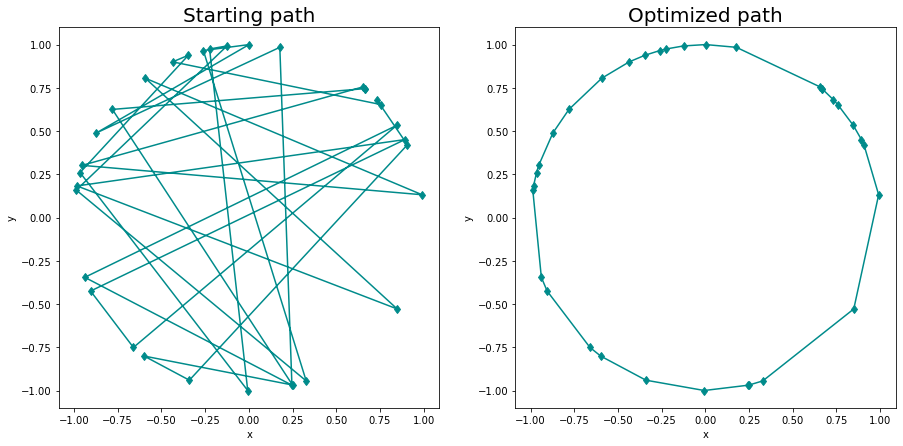

In [7]:
#Plotting picture of the best path
fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].plot( x_circle , y_circle , marker = "d" , color = "Darkcyan")
ax[1].plot(x_circle_ordered , y_circle_ordered , marker="d" , color = "Darkcyan")

ax[0].set_title( "Starting path" , fontsize = 20)
ax[1].set_title( "Optimized path" , fontsize = 20)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

    I grafici mettono a confronto il cammino iniziale e quello ottimizzato. È evidente l'ottimo funzionamento del codice, che riesce ad individuare in modo efficacie il cammino più breve sulla circonferenza.

In [8]:
#Carico i file contenenti l'evoluzione del costo del cammino nelle generazioni.
cost_circ , avg_cost_circ = np.loadtxt( "cost_circle.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)

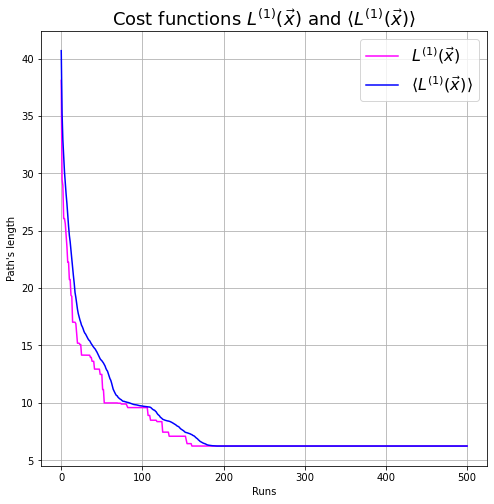

In [9]:
fig , ax = plt.subplots( 1 , 1 , figsize=( 8 , 8 ) )
ax.plot(np.arange(len(cost_circ)) , cost_circ , label = r"$L^{(1)}(\vec x)$" , color = "fuchsia" )
ax.plot(np.arange(len(avg_cost_circ)) , avg_cost_circ , label = r"$\langle L^{(1)}(\vec x) \rangle $" , color = "blue")

ax.set_title( r"Cost functions $L^{(1)}(\vec x)$ and $\langle L^{(1)}(\vec x) \rangle $" , fontsize = 18)
ax.legend(loc="best" , prop={'size': 16})
ax.set_xlabel("Runs")
ax.set_ylabel("Path's length")
ax.grid(True)

    Il grafico riporta il costo del miglior cammino in funzione del numero di run eseguite in rosa, mentre in blu è riportato il costo medio della migliore metà della popolazione per ogni generazione. Come mi aspetto, il fitness dei cromosomi migliora notevolmente all'aumentare del numero di epoche. Inoltre il costo medio è leggermente superiore al costo del solo cammino migliore per le prime 200 generazioni, dopo di che i due valori coincidono che indica che metà della popolazione è costituita da cammini con un ottimo fitness, quindi è sufficiente un numero di run inferiore a 500 per ottenere un buon risultato.

## Part 2: <span style="color:indigo"> Cities inside a 2x2 square <span>

In [10]:
#Riordino le città secondo l'ordine contenuto nel miglior cammino
x_square_ordered = x_square[best_path_square-1]
y_square_ordered = y_square[best_path_square-1]

In [11]:
#Riaggiungo la prima città in coda per far sì che il cammino si chiuda
x_square_ordered = np.append( x_square_ordered , x_square_ordered[0])
y_square_ordered = np.append( y_square_ordered , y_square_ordered[0])

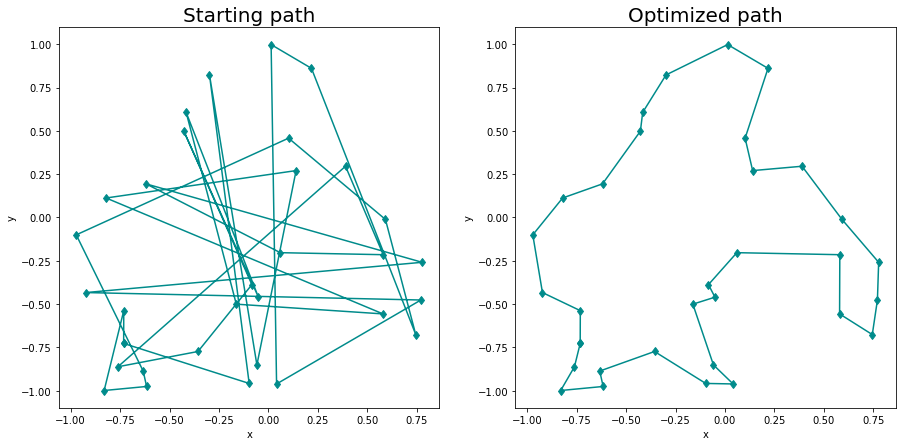

In [12]:
#Plotting picture of the best path
fig, ax = plt.subplots( 1 , 2 , figsize=(15 , 7))
ax[0].plot( x_square , y_square , marker = "d" , color ="darkcyan" )
ax[1].plot(x_square_ordered , y_square_ordered , marker="d" , color ="darkcyan")

ax[0].set_title( "Starting path" , fontsize = 20)
ax[1].set_title( "Optimized path" , fontsize = 20)

for i in range(2):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")

    I grafici mettono a confronto il cammino iniziale e quello ottimizzato. È evidente l'ottimo funzionamento del codice, che riesce ad individuare in modo efficacie il cammino più breve nel quadrato.

In [13]:
#Carico i file contenenti l'evoluzione del costo del cammino nelle generazioni.
cost_square , avg_cost_square = np.loadtxt( "cost_square.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)

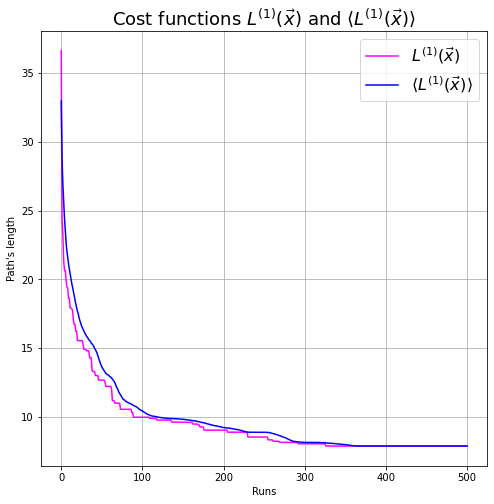

In [14]:
fig , ax = plt.subplots( 1 , 1 , figsize=( 8 , 8 ) )
ax.plot(np.arange(len(cost_square)) , cost_square , label = r"$L^{(1)}(\vec x)$" , color = "fuchsia")
ax.plot(np.arange(len(avg_cost_square)) , avg_cost_square , label = r"$\langle L^{(1)}(\vec x) \rangle $" , color="blue")

ax.set_title( r"Cost functions $L^{(1)}(\vec x)$ and $\langle L^{(1)}(\vec x) \rangle $" , fontsize = 18)
ax.legend(loc="best" , prop={'size': 16})
ax.set_xlabel("Runs")
ax.set_ylabel("Path's length")
ax.grid(True)

    Il grafico riporta il costo del miglior cammino in funzione del numero di run eseguite in rosa, mentre in blu è riportato il costo medio della migliore metà della popolazione per ogni generazione. Come mi aspetto, il fitness dei cromosomi migliora notevolmente all'aumentare del numero di epoche. Inoltre il costo medio è leggermente superiore al costo del solo cammino migliore per le prime 200 generazioni, dopo di che i due valori coincidono che indica che metà della popolazione è costituita da cammini con un ottimo fitness, quindi è sufficiente un numero di run inferiore a 500 per ottenere un buon risultato.